# Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Reading both datasets

In [2]:
accident_data = pd.read_csv("accident_data.csv")

In [5]:
vehicle_data = pd.read_csv('vehicle_data.csv',encoding='unicode_escape')

### Overview of accident dataset

In [75]:
pd.set_option('display.max_columns', None) #For showing all columns
accident_data.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
1,200501BS00002,B,450.0,C,0.0,Slight,None,2005-05-01,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524170.0,181650.0,-0.211708,E01002909,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,None,30,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,Unclassified,0.0,Slight,None,2005-06-01,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524520.0,182240.0,-0.206458,E01002857,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,00:15,Urban,Fine no high winds,2005,No
4,200501BS00005,A,0.0,Unclassified,0.0,Slight,None,2005-10-01,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,528060.0,179040.0,-0.156618,E01002863,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,None,30,21:13,Urban,Fine no high winds,2005,No
6,200501BS00007,C,0.0,Unclassified,0.0,Slight,None,2005-01-13,Thursday,1.0,Give way or uncontrolled,T or staggered junction,51.512695,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524220.0,180830.0,-0.211277,E01002875,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,20:40,Urban,Fine no high winds,2005,No
8,200501BS00010,A,3212.0,B,304.0,Slight,None,2005-01-15,Saturday,1.0,Auto traffic signal,Crossroads,51.483420,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,527350.0,177650.0,-0.167342,E01002900,2,2,0.0,5.0,Metropolitan Police,Dry,Single carriageway,None,30,22:43,Urban,Fine no high winds,2005,No


We can see few missing data values here

#### Finding missing values in the accident data

In [16]:
(accident_data.isnull().sum() / accident_data.shape[0]) * 100

Accident_Index                                  0.000000
1st_Road_Class                                 29.143266
1st_Road_Number                                 0.000191
2nd_Road_Class                                 41.944925
2nd_Road_Number                                 1.030255
Accident_Severity                               0.000000
Carriageway_Hazards                             0.002766
Date                                            0.000000
Day_of_Week                                     0.000000
Did_Police_Officer_Attend_Scene_of_Accident     0.025654
Junction_Control                                0.000000
Junction_Detail                                 0.000000
Latitude                                        0.010586
Light_Conditions                                0.198746
Local_Authority_(District)                      0.000000
Local_Authority_(Highway)                       0.000000
Location_Easting_OSGR                           0.010586
Location_Northing_OSGR         

As we can see there few columns have negligible percentage of missing values.
Following columns have a lot of missing values
* 1st_Road_Class
* 2nd_Road_Class
* LSOA_of_Accident_Location

##### Let's visualize our findings

<AxesSubplot:>

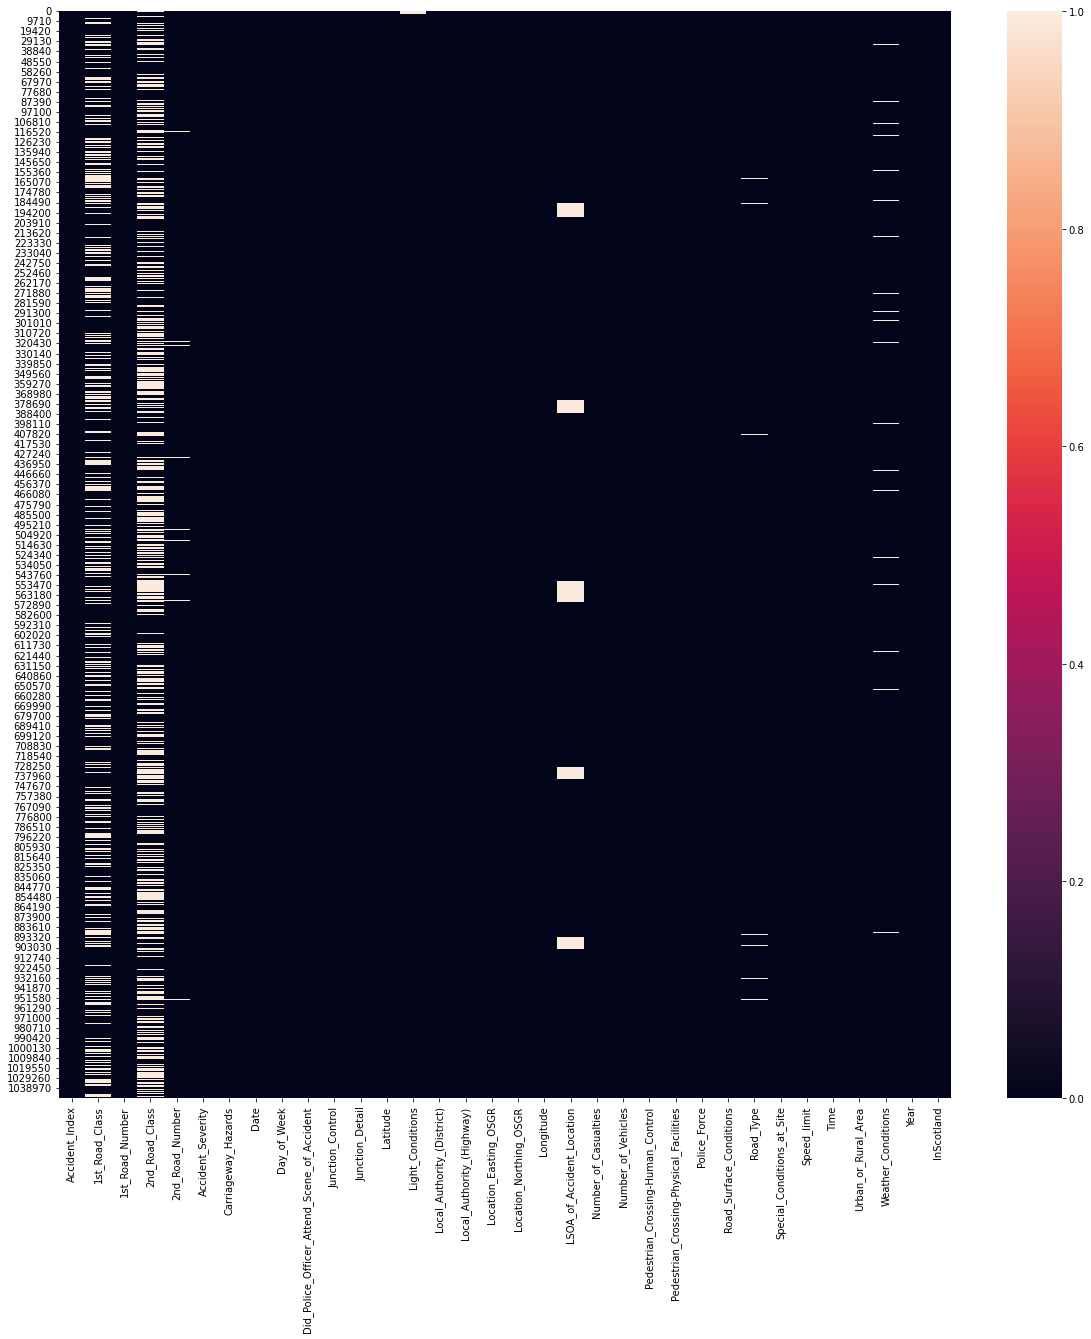

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(accident_data.isnull())

##### This heatmap seconds our numerical analysis, the light color stripes in the visualization above represent the null values, and others show the normal data

##### First lets drop the samples null columns which have less than 3% of their values as null

In [32]:
less_than_3 = []
for col in accident_data.columns:
    if (accident_data[col].isnull().sum()/accident_data.shape[0])<0.03:
        less_than_3.append(col)

In [35]:
accident_data.dropna(axis=0, subset=less_than_3, how='any',inplace=True)

##### Now let's treat the columns where null values are > 3%

##### All these columns are of object type we can use mode value to fill the missing data

In [59]:
for col in ['1st_Road_Class','2nd_Road_Class','LSOA_of_Accident_Location']:
    mode = accident_data[col].mode()
    accident_data[col] = accident_data[col].replace(np.NaN, mode.values[0])

In [62]:
(accident_data.isnull().sum() / accident_data.shape[0]) * 100

Accident_Index                                 0.0
1st_Road_Class                                 0.0
1st_Road_Number                                0.0
2nd_Road_Class                                 0.0
2nd_Road_Number                                0.0
Accident_Severity                              0.0
Carriageway_Hazards                            0.0
Date                                           0.0
Day_of_Week                                    0.0
Did_Police_Officer_Attend_Scene_of_Accident    0.0
Junction_Control                               0.0
Junction_Detail                                0.0
Latitude                                       0.0
Light_Conditions                               0.0
Local_Authority_(District)                     0.0
Local_Authority_(Highway)                      0.0
Location_Easting_OSGR                          0.0
Location_Northing_OSGR                         0.0
Longitude                                      0.0
LSOA_of_Accident_Location      

##### Viola, we dealt with all of the missing data

In [64]:
accident_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1007921 entries, 1 to 1048574
Data columns (total 34 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1007921 non-null  object 
 1   1st_Road_Class                               1007921 non-null  object 
 2   1st_Road_Number                              1007921 non-null  float64
 3   2nd_Road_Class                               1007921 non-null  object 
 4   2nd_Road_Number                              1007921 non-null  float64
 5   Accident_Severity                            1007921 non-null  object 
 6   Carriageway_Hazards                          1007921 non-null  object 
 7   Date                                         1007921 non-null  object 
 8   Day_of_Week                                  1007921 non-null  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  1

##### We can see few columns are not in correct data types, like Date. Let's fix it.

In [69]:
accident_data['Date'] = pd.to_datetime(accident_data['Date'],'DD/MM/YYYY')

In [72]:
accident_data['Date'].dtype

dtype('<M8[ns]')

### Overview of vehicle dataset

In [76]:
pd.set_option('display.max_columns', None) #For showing all columns
vehicle_data.head()

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
0,200401BS00001,26 - 35,3.0,Urban area,4.0,1588.0,None,None,Data missing or out of range,Data missing or out of range,ROVER,45 CLASSIC 16V,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
1,200401BS00002,26 - 35,NaN,Urban area,3.0,NaN,None,None,Data missing or out of range,Data missing or out of range,BMW,C1,NaN,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,109,Data missing or out of range,Front,2004
2,200401BS00003,26 - 35,4.0,Data missing or out of range,NaN,998.0,None,None,Data missing or out of range,Data missing or out of range,NISSAN,MICRA CELEBRATION 16V,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,109,Data missing or out of range,Front,2004
3,200401BS00003,66 - 75,NaN,Data missing or out of range,NaN,NaN,None,None,Data missing or out of range,Data missing or out of range,LONDON TAXIS INT,TXII GOLD AUTO,NaN,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
4,200401BS00004,26 - 35,1.0,Urban area,4.0,124.0,None,None,Data missing or out of range,Data missing or out of range,PIAGGIO,VESPA ET4,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,Data missing or out of range,Front,2004


##### We can see few missing data values here and another text 'Data missing or out of range'

In [78]:
(vehicle_data.isnull().sum() / accident_data.shape[0]) * 100

Accident_Index                       0.000000
Age_Band_of_Driver                   0.000000
Age_of_Vehicle                      35.533440
Driver_Home_Area_Type                0.000000
Driver_IMD_Decile                   72.903730
Engine_Capacity_.CC.                26.377166
Hit_Object_in_Carriageway            0.000000
Hit_Object_off_Carriageway           0.000000
Journey_Purpose_of_Driver            0.000000
Junction_Location                    0.000000
make                                10.997390
model                               32.277430
Propulsion_Code                     24.391098
Sex_of_Driver                        0.000000
Skidding_and_Overturning             0.000000
Towing_and_Articulation              0.000000
Vehicle_Leaving_Carriageway          0.000000
Vehicle_Location.Restricted_Lane     0.130665
Vehicle_Manoeuvre                    0.000000
Vehicle_Reference                    0.000000
Vehicle_Type                         0.000000
Was_Vehicle_Left_Hand_Drive       

In [86]:
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177205 entries, 0 to 2177204
Data columns (total 24 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Accident_Index                    object 
 1   Age_Band_of_Driver                object 
 2   Age_of_Vehicle                    float64
 3   Driver_Home_Area_Type             object 
 4   Driver_IMD_Decile                 float64
 5   Engine_Capacity_.CC.              float64
 6   Hit_Object_in_Carriageway         object 
 7   Hit_Object_off_Carriageway        object 
 8   Journey_Purpose_of_Driver         object 
 9   Junction_Location                 object 
 10  make                              object 
 11  model                             object 
 12  Propulsion_Code                   object 
 13  Sex_of_Driver                     object 
 14  Skidding_and_Overturning          object 
 15  Towing_and_Articulation           object 
 16  Vehicle_Leaving_Carriageway       ob

##### We'll fill the missing value of object columns with mode, and numeric with mean

In [83]:
for col in vehicle_data.columns:
    if vehicle_data[col].dtype=='O':
        mode = vehicle_data[col].mode()
        vehicle_data[col] = vehicle_data[col].replace(np.NaN, mode.values[0])
    else:
        mean = vehicle_data[col].mean()
        vehicle_data[col] = vehicle_data[col].replace(np.NaN, mean)      

In [84]:
(vehicle_data.isnull().sum() / accident_data.shape[0]) * 100

Accident_Index                      0.0
Age_Band_of_Driver                  0.0
Age_of_Vehicle                      0.0
Driver_Home_Area_Type               0.0
Driver_IMD_Decile                   0.0
Engine_Capacity_.CC.                0.0
Hit_Object_in_Carriageway           0.0
Hit_Object_off_Carriageway          0.0
Journey_Purpose_of_Driver           0.0
Junction_Location                   0.0
make                                0.0
model                               0.0
Propulsion_Code                     0.0
Sex_of_Driver                       0.0
Skidding_and_Overturning            0.0
Towing_and_Articulation             0.0
Vehicle_Leaving_Carriageway         0.0
Vehicle_Location.Restricted_Lane    0.0
Vehicle_Manoeuvre                   0.0
Vehicle_Reference                   0.0
Vehicle_Type                        0.0
Was_Vehicle_Left_Hand_Drive         0.0
X1st_Point_of_Impact                0.0
Year                                0.0
dtype: float64

##### Now we can see, there are no missing values now.

### Lets merge the datasets to get better insights

##### The common column to merge the datasets is accident index. Let's merge.

In [87]:
# Using inner join to keep only common data between both datasets
final_df = accident_data.merge(vehicle_data, on='Accident_Index', how='inner')

In [88]:
final_df.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year_x,InScotland,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year_y
0,200501BS00002,B,450.0,C,0.0,Slight,None,2005-05-01,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524170.0,181650.0,-0.211708,E01002909,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,None,30,17:36,Urban,Fine no high winds,2005,No,36 - 45,3.000000,Data missing or out of range,5.387559,8268.000000,None,None,Journey as part of work,Leaving roundabout,DENNIS,MISSING,Heavy oil,Male,None,No tow/articulation,Did not leave carriageway,0.0,Slowing or stopping,1,Bus or coach (17 or more pass seats),No,Nearside,2005
1,200501BS00003,C,0.0,Unclassified,0.0,Slight,None,2005-06-01,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524520.0,182240.0,-0.206458,E01002857,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,00:15,Urban,Fine no high winds,2005,No,26 - 35,5.000000,Urban area,3.000000,8300.000000,Parked vehicle,None,Journey as part of work,Not at or within 20 metres of junction,DENNIS,MISSING,Heavy oil,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead right-hand bend,1,Bus or coach (17 or more pass seats),No,Nearside,2005
2,200501BS00005,A,0.0,Unclassified,0.0,Slight,None,2005-10-01,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,528060.0,179040.0,-0.156618,E01002863,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,None,30,21:13,Urban,Fine no high winds,2005,No,46 - 55,10.000000,Data missing or out of range,5.387559,85.000000,Kerb,None,Other/Not known (2005-10),Not at or within 20 metres of junction,HONDA,MISSING,Petrol,Male,Skidded,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,No,Front,2005
3,200501BS00007,C,0.0,Unclassified,0.0,Slight,None,2005-01-13,Thursday,1.0,Give way or uncontrolled,T or staggered junction,51.512695,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524220.0,180830.0,-0.211277,E01002875,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,20:40,Urban,Fine no high winds,2005,No,26 - 35,7.108167,Data missing or out of range,5.387559,2042.233961,Parked vehicle,None,Other/Not known (2005-10),Approaching junction or waiting/parked at junc...,AUDI,A4 T AUTO,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,No,Front,2005
4,200501BS00007,C,0.0,Unclassified,0.0,Slight,None,2005-01-13,Thursday,1.0,Give way or uncontrolled,T or staggered junction,51.512695,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524220.0,180830.0,-0.211277,E01002875,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,20:40,Urban,Fine no high winds,2005,No,36 - 45,4.000000,Urb

In [92]:
final_df.describe()

,1st_Road_Number,2nd_Road_Number,Did_Police_Officer_Attend_Scene_of_Accident,Latitude,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Speed_limit,Year_x,Age_of_Vehicle,Driver_IMD_Decile,Engine_Capacity_.CC.,Vehicle_Location.Restricted_Lane,Vehicle_Reference,Year_y
count,511581.000000,511581.000000,511581.000000,511581.000000,511581.000000,5.115810e+05,511581.000000,511581.000000,511581.000000,511581.000000,511581.000000,511581.000000,511581.000000,511581.000000,511581.000000,511581.000000,511581.000000,511581.000000,511581.000000
mean,991.279123,413.509814,1.163853,52.432724,443156.616157,2.827716e+05,-1.382854,1.457136,2.119723,0.006036,0.708207,39.386265,2007.796112,6.481198,5.281556,2142.876332,0.091940,1.551936,2007.796112
std,1813.839317,1366.789638,0.376743,1.255530,96032.509837,1.394343e+05,1.409913,0.960300,0.914036,0.100716,1.762410,14.334217,1.714960,4.173757,2.503912,2034.453806,0.799419,0.752386,1.714960
min,0.000000,0.000000,1.000000,49.914488,64950.000000,1.052000e+04,-7.516225,1.000000,1.000000,0.000000,0.000000,10.000000,2005.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2005.000000
25%,0.000000,0.000000,1.000000,51.513014,384180.000000,1.809200e+05,-2.238635,1.000000,2.000000,0.000000,0.000000,30.000000,2006.000000,3.000000,3.000000,1360.000000,0.000000,1.000000,2006.000000
50%,124.000000,0.000000,1.000000,52.071897,454120.000000,2.440100e+05,-1.197827,1.000000,2.000000,0.000000,0.000000,30.000000,2008.000000,7.000000,5.387559,1796.000000,0.000000,1.000000,2008.000000
75%,665.000000,0.000000,1.000000,53.398168,524460.000000,3.893100e+05,-0.203303,2.000000,2.000000,0.000000,0.000000,50.000000,2009.000000,9.000000,7.000000,2042.233961,0.000000,2.000000,2009.000000
max,9999.000000,9999.000000,3.000000,60.757544,655290.000000,1.208800e+06,1.758337,68.000000,32.000000,2.000000,8.000000,70.000000,2010.000000,85.000000,10.000000,96000.000000,9.000000,32.000000,2010.000000


In [93]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511581 entries, 0 to 511580
Data columns (total 57 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Accident_Index                               511581 non-null  object        
 1   1st_Road_Class                               511581 non-null  object        
 2   1st_Road_Number                              511581 non-null  float64       
 3   2nd_Road_Class                               511581 non-null  object        
 4   2nd_Road_Number                              511581 non-null  float64       
 5   Accident_Severity                            511581 non-null  object        
 6   Carriageway_Hazards                          511581 non-null  object        
 7   Date                                         511581 non-null  datetime64[ns]
 8   Day_of_Week                                  511581 non-null  ob

##### Now let's extract some key insights

<AxesSubplot:xlabel='Sex_of_Driver', ylabel='count'>

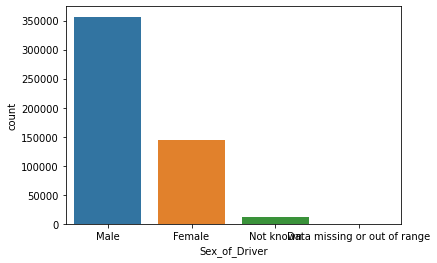

In [96]:
sns.countplot(x=final_df['Sex_of_Driver'])

##### Majority of accidents are caused by man

<AxesSubplot:xlabel='Day_of_Week', ylabel='count'>

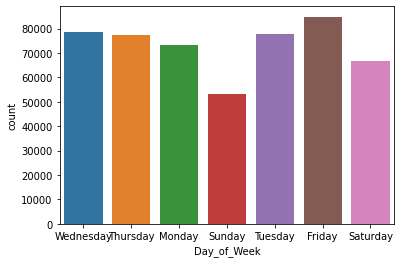

In [98]:
sns.countplot(x=final_df['Day_of_Week'])

##### Majority of accidents are on friday

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Dual carriageway'),
  Text(1, 0, 'Single carriageway'),
  Text(2, 0, 'One way street'),
  Text(3, 0, 'Roundabout'),
  Text(4, 0, 'Slip road')])

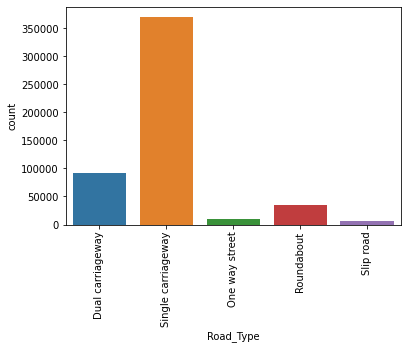

In [101]:
sns.countplot(x=final_df['Road_Type'])
plt.xticks(rotation=90)

##### Majorrity of accidents occur on single carriage way

##### We noticed that we had year columns in both datasets and it is now redundant, lets remove one and rename the other

In [116]:
final_df.drop(columns='Year_y',inplace=True)

In [118]:
final_df.rename(columns={'Year_x':'Year'},inplace=True)

##### Now lets see the trends in accidents by year

<AxesSubplot:xlabel='Year', ylabel='count'>

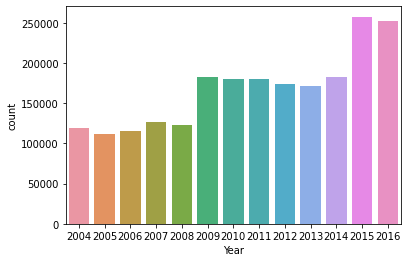

In [123]:
sns.countplot(x=vehicle_data['Year'])

##### Accidents have doubled in the previos decade, that's alarming
Lets look at the casualities each year

In [138]:
casualities_per_year = accident_data.groupby('Year')['Number_of_Casualties'].sum()

<AxesSubplot:xlabel='Year'>

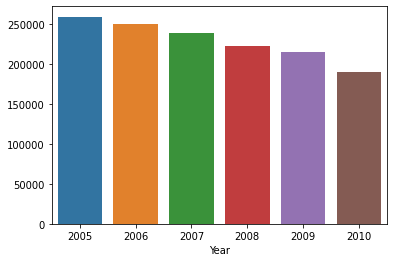

In [152]:
sns.barplot(x=casualities_per_year.index,y=casualities_per_year.values)

##### Number of accidents have increase but deaths are less, means that maybe its due to safety measures in vehicles

<AxesSubplot:xlabel='Accident_Severity', ylabel='count'>

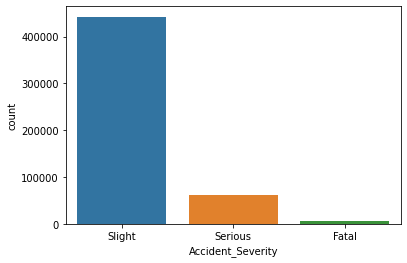

In [154]:
sns.countplot(x=final_df['Accident_Severity'])

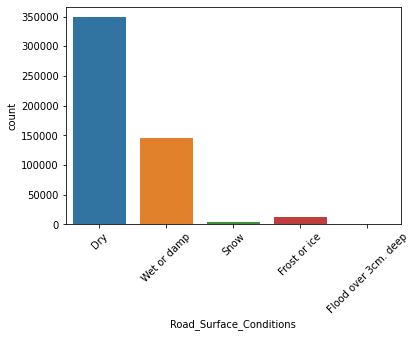

In [156]:
sns.countplot(x=final_df['Road_Surface_Conditions'])
plt.xticks(rotation=45)
plt.show()

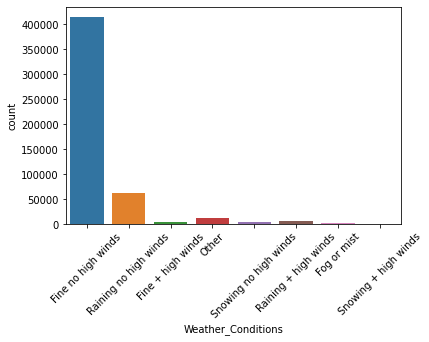

In [157]:
sns.countplot(x=final_df['Weather_Conditions'])
plt.xticks(rotation=45)
plt.show()

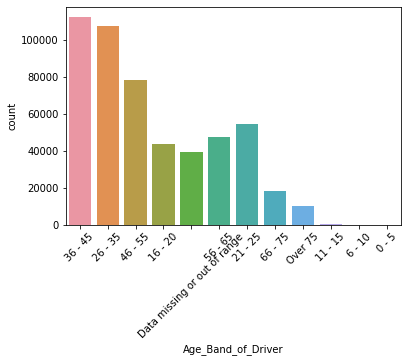

In [160]:
sns.countplot(x=final_df['Age_Band_of_Driver'])
plt.xticks(rotation=45)
plt.show()